# Mod 5: Technical Notebook

In [1]:
import os
import pandas as pd
import numpy as np

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
import sklearn.preprocessing as PP
import imblearn.pipeline as PL
import sklearn.model_selection as MS
import imblearn.under_sampling as US
import imblearn.over_sampling as OS

import sklearn.linear_model as LM
import sklearn.tree as TR
import sklearn.ensemble as ES 
import sklearn.metrics as MT     

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [3]:
%load_ext autoreload
%autoreload 2         # reload custom py file eveytime a new cell is run

import lego_helper as lh

## 1.1 Scrape Sets' URL

File: ```brickset_set_url.ipynb```

Goal: Get the set url for every set on the brickset website. Traverse the website by year.   

Result: Set url data is output to the file ```brickset_set_url.csv```.   

In [4]:
set_ls = lh.get_year('1990')
set_ls[:2]

year: 1990
last page: 6


[{'set_no': '260', 'name': 'Idea Book', 'url': '/sets/260-1/Idea-Book'},
 {'set_no': '315',
  'name': 'Basic Building Set, 3+',
  'url': '/sets/315-1/Basic-Building-Set-3'}]

In [5]:
set_df = pd.DataFrame(set_ls)
set_df = set_df[['set_no', 'name', 'url']]
set_df.head()
set_df.info()

,set_no,name,url
0,260,Idea Book,/sets/260-1/Idea-Book
1,315,"Basic Building Set, 3+",/sets/315-1/Basic-Building-Set-3
2,325,"Basic Building Set, 3+",/sets/325-1/Basic-Building-Set-3
3,335,"Basic Building Set, 3+",/sets/335-1/Basic-Building-Set-3
4,365,"Basic Building Set, 3+",/sets/365-2/Basic-Building-Set-3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 3 columns):
set_no    126 non-null object
name      126 non-null object
url       126 non-null object
dtypes: object(3)
memory usage: 3.0+ KB


## 1.2 Scrape Data for All Sets

File: ```brickset_set_raw.ipynb```

Goal: Loop over the sets' url data and get all the data fields.    

Result: The set urls are split into 4 jobs, the result of each job is output as a csv.

In [6]:
# get data from a new set

TEST_URL = '/sets/4758-1/Hogwarts-Express' 
set1_dx = lh.get_set_data(TEST_URL)
set1_dx

{'set_no': '4758-1',
 'name': 'Hogwarts Express',
 'url': '/sets/4758-1/Hogwarts-Express',
 'set_type': 'Normal',
 'theme_group': 'Licensed',
 'theme': 'Harry Potter',
 'subtheme': 'Prisoner of Azkaban',
 'year': '2004',
 'tags': 'Dementor, Harry Potter, Professor Remus Lupin, Ron Weasley, Lamppost, Magic, Owl',
 'piece_cnt': '389',
 'minifig_cnt': '4',
 'inventory_url': '/inventories/4758-1',
 'minifig_url': '/minifigs/inset-4758-1',
 'store_price': '£34.99, $40.00',
 'current_price': 'New: $124, Used: $93',
 'packaging': 'Box',
 'dimensions': '33.6 x 28.8 x 7.2 cm (13.2 x 11.3 x 2.8 in)',
 'weight': '0.79Kg (1.74 lb)',
 'notes': None,
 'rating_value': '4.3',
 'rating_votes': '4'}

## 1.3 Merge Set Data

File: ```brickset_set_merge.ipynb```

Goal: To concatenate the job files with raw data.

Result: All sets' raw data is available in one file ```brickset_set_full.csv```.

In [7]:
SET_0_FILE = 'data/brickset_job_0k.csv'
SET_3_FILE = 'data/brickset_job_3k.csv'
SET_7_FILE = 'data/brickset_job_7k.csv'
SET_10_FILE = 'data/brickset_job_10k.csv'

set_0_df = pd.read_csv(SET_0_FILE)
set_3_df = pd.read_csv(SET_3_FILE)
set_7_df = pd.read_csv(SET_7_FILE)
set_10_df = pd.read_csv(SET_10_FILE)

set_0_df.shape
set_3_df.shape
set_7_df.shape
set_10_df.shape

(3499, 20)

(3499, 20)

(3499, 20)

(3399, 20)

## 2.1 Do Second Round of Data Cleaning

File: ```brickset_set_clean.ipynb```

Goal: To do some EDA on all the data fields and clean them in the process. 

Result: The cleaned dataset is exported as ```brickset_set_clean.csv```.

In [8]:
RAW_FILE = 'data/brickset_set_full.csv'
set_df = pd.read_csv(RAW_FILE)
set_df.head()
set_df.info()

,set_no,name,theme_group,theme,subtheme,year,dimensions,weight,piece_cnt,minifig_cnt,inventory_url,minifig_url,store_price,current_price,rating_value,rating_votes,tags,set_type,packaging,notes
0,722-1,"Universal Building Set, 7+",Basic,Basic,NaN,1980.0,NaN,NaN,301.0,0.0,NaN,NaN,$20.00,"New: $200, Used: $78",4.4,5,"Aircraft, Helicopter, Truck, Car, Boat, Crane,...",Normal,NaN,NaN
1,733-1,"Universal Building Set, 7+",Basic,Basic,NaN,1980.0,NaN,NaN,533.0,0.0,NaN,NaN,$39.00,"New: $566, Used: $109",4.5,2,"Helicopter, Truck, Baseplate, Crane, Racing, Base",Normal,NaN,NaN
2,744-1,"Universal Building Set with Motor, 7+",Basic,Basic,NaN,1980.0,NaN,NaN,537.0,0.0,NaN,NaN,$59.00,"New: $252, Used: $97",5.0,2,"Truck, Crane, Windmill",Normal,NaN,NaN
3,820-1,Red Plates Parts Pack,Basic,Basic,Supplementaries,1980.0,NaN,NaN,34.0,0.0,NaN,NaN,$4.75,"New: Not known, Used: Not known",NaN,NaN,NaN,Normal,NaN,NaN
4,822-1,Blue Plates Parts Pack,Basic,Basic,Supplementaries,1980.0,NaN,NaN,34.0,0.0,NaN,NaN,$4.75,"New: $29, Used: $5",NaN,NaN,NaN,Normal,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13762 entries, 0 to 13761
Data columns (total 20 columns):
set_no           13762 non-null object
name             13762 non-null object
theme_group      13762 non-null object
theme            13762 non-null object
subtheme         10048 non-null object
year             13762 non-null float64
dimensions       2925 non-null object
weight           3086 non-null object
piece_cnt        10862 non-null float64
minifig_cnt      13762 non-null float64
inventory_url    6961 non-null object
minifig_url      6266 non-null object
store_price      9188 non-null object
current_price    13762 non-null object
rating_value     6825 non-null float64
rating_votes     6825 non-null object
tags             10269 non-null object
set_type         13762 non-null object
packaging        8923 non-null object
notes            5233 non-null object
dtypes: float64(4), object(16)
memory usage: 2.1+ MB


(array([119.,  73.,  68.,  76.,  83., 140., 148., 195.,  75., 141., 126.,
        143., 105., 152., 147., 163., 204., 257., 375., 340., 378., 402.,
        444., 426., 413., 372., 462., 447., 436., 453., 524., 585., 675.,
        701., 734., 752., 801., 839., 788.]),
 array([1980.        , 1980.97435897, 1981.94871795, 1982.92307692,
        1983.8974359 , 1984.87179487, 1985.84615385, 1986.82051282,
        1987.79487179, 1988.76923077, 1989.74358974, 1990.71794872,
        1991.69230769, 1992.66666667, 1993.64102564, 1994.61538462,
        1995.58974359, 1996.56410256, 1997.53846154, 1998.51282051,
        1999.48717949, 2000.46153846, 2001.43589744, 2002.41025641,
        2003.38461538, 2004.35897436, 2005.33333333, 2006.30769231,
        2007.28205128, 2008.25641026, 2009.23076923, 2010.20512821,
        2011.17948718, 2012.15384615, 2013.12820513, 2014.1025641 ,
        2015.07692308, 2016.05128205, 2017.02564103, 2018.        ]),
 <a list of 39 Patch objects>)

[Text(0, 0.5, 'Total of Sets'), Text(0.5, 0, 'Year')]

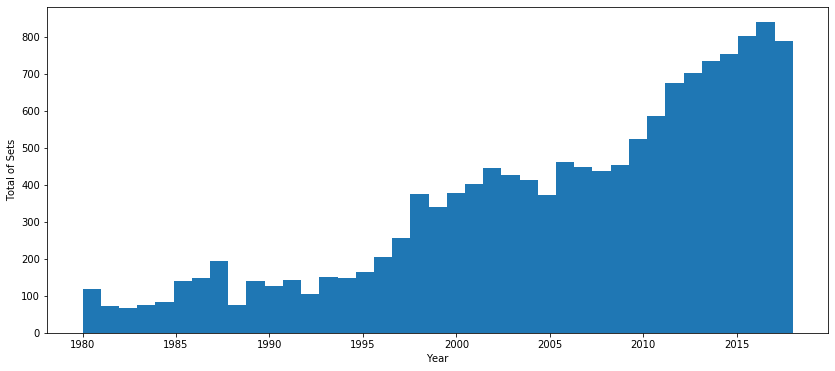

In [9]:
# plot number of sets per year

fig, axs = plt.subplots(1, 1, figsize=(14, 6))
axs.hist(set_df['year'].values, bins=set_df['year'].unique().shape[0])
axs.set(xlabel='Year', ylabel='Total of Sets')
plt.show()

In [10]:
# clean current price, and create 2 new columns

set_df['price_used'] = set_df['current_price'].apply(lh.get_price_used)
set_df['price_new'] = set_df['current_price'].apply(lh.get_price_new)
set_df[['set_no', 'name', 'current_price', 'price_used', 'price_new']][2205:2215]

,set_no,name,current_price,price_used,price_new
2205,2161-1,Aqua Dozer,"New: $90, Used: $21",21.0,90.0
2206,2162-1,Hydro Reef Wrecker,"New: $89, Used: $44",44.0,89.0
2207,2163-1,Toucan,"New: $1, Used: $0",0.0,1.0
2208,2164-1,Whale,"New: $2, Used: $1",1.0,2.0
2209,2165-1,Rhinocerous,"New: $2, Used: Not known",NaN,2.0
2210,2166-1,Elephant,"New: $3, Used: Not known",NaN,3.0
2211,2167-1,Penguin,"New: $2, Used: Not known",NaN,2.0
2212,2168-1,Rattle,"New: $5, Used: Not known",NaN,5.0
2213,2181-1,Infomaniac,"New: $44, Used: $45",45.0,44.0
2214,2184-1,XL Bulk Bucket,"New: Not known, Used: Not known",NaN,NaN


## 2.2 Filter Out Non-System Sets

File: ```brickset_set_filter.ipynb```

Goal: Start with the full cleaned brickset sets file, and remove sets which are not appropriate for analysis (because it would be comparing apples to oranges). This includes filtering out baby sets (pieces are larger than regular legos), keychains, games, esoteric promotional sets, etc.       

Result: Creates the file ```brickset_set_filter.csv```.

In [11]:
SET_FILE = 'data/brickset_set_clean.csv'
set_df = pd.read_csv(SET_FILE)
set_df.head()
set_df.info()

,set_no,name,theme_group,theme,subtheme,year,volume,weight,piece_cnt,minifig_cnt,inventory_url,minifig_url,price_store,price_new,price_used,rating_value,rating_votes,main_tag,set_type,packaging
0,722-1,"Universal Building Set, 7+",Basic,Basic,NaN,1980.0,NaN,NaN,301.0,0.0,NaN,NaN,20.00,200.0,78.0,4.4,5.0,NaN,Normal,NaN
1,733-1,"Universal Building Set, 7+",Basic,Basic,NaN,1980.0,NaN,NaN,533.0,0.0,NaN,NaN,39.00,566.0,109.0,4.5,2.0,NaN,Normal,NaN
2,744-1,"Universal Building Set with Motor, 7+",Basic,Basic,NaN,1980.0,NaN,NaN,537.0,0.0,NaN,NaN,59.00,252.0,97.0,5.0,2.0,NaN,Normal,NaN
3,820-1,Red Plates Parts Pack,Basic,Basic,Supplementaries,1980.0,NaN,NaN,34.0,0.0,NaN,NaN,4.75,NaN,NaN,NaN,NaN,NaN,Normal,NaN
4,822-1,Blue Plates Parts Pack,Basic,Basic,Supplementaries,1980.0,NaN,NaN,34.0,0.0,NaN,NaN,4.75,29.0,5.0,NaN,NaN,NaN,Normal,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13762 entries, 0 to 13761
Data columns (total 20 columns):
set_no           13762 non-null object
name             13762 non-null object
theme_group      13762 non-null object
theme            13762 non-null object
subtheme         10048 non-null object
year             13762 non-null float64
volume           2925 non-null float64
weight           3086 non-null float64
piece_cnt        10862 non-null float64
minifig_cnt      13762 non-null float64
inventory_url    6961 non-null object
minifig_url      6266 non-null object
price_store      8384 non-null float64
price_new        8532 non-null float64
price_used       7048 non-null float64
rating_value     6825 non-null float64
rating_votes     6825 non-null float64
main_tag         0 non-null float64
set_type         13762 non-null object
packaging        8923 non-null object
dtypes: float64(11), object(9)
memory usage: 2.1+ MB


In [12]:
# filter by group-theme to get rid of baby sets, etc

remove_group_ls = ['Basic', 'Educational', 'Miscellaneous', 'Other', 'Pre-school', 'Vintage themes', ]
set_df = set_df.loc[set_df['theme_group'].isin(remove_group_ls)==False]
set_df.shape

(7118, 20)

## 2.3 Join Brickset With Kaggle

File: ```merge_brickset_kaggle.ipynb```

Goal: Merge the filtered brickset set data with kaggle inventory data (for number of parts, colors, etc).

Result: Outputs the file ```merge_full.csv```.

In [13]:
FILTER_FILE = 'data/brickset_set_filter.csv'
INVENTORIES_FILE = 'data/kaggle_inventories.csv'
INVENTORYPARTS_FILE = 'data/kaggle_inventory_parts.csv'
COLORS_FILE = 'data/kaggle_colors.csv'
PARTS_FILE = 'data/kaggle_parts.csv'
PARTCATEGORIES_FILE = 'data/kaggle_part_categories.csv'

In [14]:
brickset = pd.read_csv(FILTER_FILE)
brickset[["set_no", "piece_cnt"]].head(3)

,set_no,piece_cnt
0,858-1,242.0
1,1591-1,40.0
2,1592-1,471.0


In [15]:
kaggle_inventories = pd.read_csv(INVENTORIES_FILE)
kaggle_inventories.head()

,id,version,set_num
0,1,1,7922-1
1,3,1,3931-1
2,4,1,6942-1
3,15,1,5158-1
4,16,1,903-1


In [16]:
## select needed columns
kaggle_inventories = kaggle_inventories[["set_num", "id"]]
kaggle_inventories.columns = ["set_no", "inventory_id"]
kaggle_inventories.head()

,set_no,inventory_id
0,7922-1,1
1,3931-1,3
2,6942-1,4
3,5158-1,15
4,903-1,16


In [17]:
brickset = pd.merge(brickset, kaggle_inventories, how="left")
brickset[["set_no", "piece_cnt", "inventory_id"]].head(3)

,set_no,piece_cnt,inventory_id
0,858-1,242.0,4886.0
1,1591-1,40.0,11940.0
2,1592-1,471.0,14106.0


## 2.4 Introduce New Features

File: ```merge_features.ipynb```

Goal: Create new composite features for analysis.

Result: Outputs the file ```merge_feature.csv```.

In [18]:
MERGE_FILE = 'data/merge_full.csv'
set_df = pd.read_csv(MERGE_FILE)
set_df.head()
set_df.info(verbose=True, null_counts=True)

,set_no,name,price_store,price_new,price_used,rating_value,rating_votes,theme_group,theme,subtheme,...,tiles_printed_tot_prts,tiles_special_tot_prts,tools_tot_prts,transportation_-_land_tot_prts,transportation_-_sea_and_air_tot_prts,tubes_and_hoses_tot_prts,wheels_and_tyres_tot_prts,windows_and_doors_tot_prts,windscreens_and_fuselage_tot_prts,znap_tot_prts
0,858-1,Auto Engines,NaN,NaN,51.0,4.5,2.0,Technical,Technic,NaN,...,0,0,0,0,0,6,2,0,0,0
1,1591-1,Danone Delivery Truck,NaN,129.0,28.0,NaN,NaN,Modern day,Town,Special,...,0,0,0,2,0,0,6,2,1,0
2,1592-1,Town Square - Castle Scene,NaN,1168.0,191.0,4.8,4.0,Modern day,Town,Classic,...,0,0,0,6,0,0,12,14,0,0
3,1651-2,Maersk Line Container Lorry,NaN,NaN,444.0,5.0,1.0,Modern day,Town,Special,...,0,0,0,7,0,0,28,7,1,0
4,3634-1,Charlie Crow's Carry-All,NaN,90.0,13.0,3.0,1.0,Junior,Fabuland,NaN,...,0,0,0,2,0,0,0,3,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 136 columns):
set_no                                              5303 non-null object
name                                                5303 non-null object
price_store                                         4178 non-null float64
price_new                                           5003 non-null float64
price_used                                          4972 non-null float64
rating_value                                        4560 non-null float64
rating_votes                                        4560 non-null float64
theme_group                                         5303 non-null object
theme                                               5303 non-null object
subtheme                                            3915 non-null object
year                                                5303 non-null int64
volume                                              2143 non-null float64
weight     

[Text(0, 0.5, 'Total of Sets'), (0, 200), Text(0.5, 0, 'Set Price')]

(array([ 13.,  74., 190., 298.,  43., 100., 106., 117.,  60., 380.,  16.,
         38., 145.,   4., 197.,  11.,  17.,  10.,   7., 426.,   5.,  15.,
          8.,   9., 124.,   8.,  11.,   6.,  10., 291.,   0.,   0.,   8.,
          2.,  61.,   8.,   5.,   6.,   3., 202.,   0.,   5.,   3.,   9.,
         18.,   1.,   2.,   3.,   7., 238.,   0.,   7.,   1.,   4.,  10.,
          0.,   0.,   3.,   3., 106.,   0.,   0.,   1.,   2.,   3.,   8.,
          0.,   3.,   4., 100.,   0.,   1.,   3.,   1.,   7.,   1.,   0.,
          0.,   2.,  73.,   0.,   2.,   0.,   1.,   7.,   0.,   0.,   1.,
          1.,  76.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   5.,
         83.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,  11.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  39.,   0.,
          1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,  24.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   2.,  11.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

(array([226., 410., 317., 251., 235., 163., 179., 137., 195., 124.,  86.,
        105.,  97.,  80.,  61.,  62.,  56.,  91.,  65.,  53.,  46.,  41.,
         38.,  43.,  28.,  52.,  36.,  42.,  23.,  25.,  27.,  21.,  24.,
         16.,  26.,  15.,  12.,  17.,  22.,  17.,  11.,  22.,   6.,  12.,
         17.,  12.,  12.,  13.,  13.,   7.,   4.,  15.,   9.,   3.,   8.,
          8.,   6.,   5.,   6.,   6.,   9.,   7.,   8.,   6.,   5.,   8.,
          3.,   6.,   9.,   3.,   9.,   2.,   5.,   3.,   9.,   4.,   5.,
          5.,   1.,   4.,   6.,   5.,   4.,   4.,   4.,   3.,   7.,   5.,
          4.,   2.,   2.,   4.,   2.,   5.,   4.,   3.,   5.,   1.,   4.,
          1.,   1.,   0.,   1.,   0.,   0.,   5.,   1.,   1.,   3.,   2.,
          0.,   1.,   4.,   2.,   1.,   1.,   0.,   3.,   2.,   2.,   1.,
          1.,   1.,   0.,   0.,   0.,   1.,   3.,   0.,   2.,   0.,   0.,
          0.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   3.,   1.,   0.,
          0.,   2.,   0.,   0.,   0., 

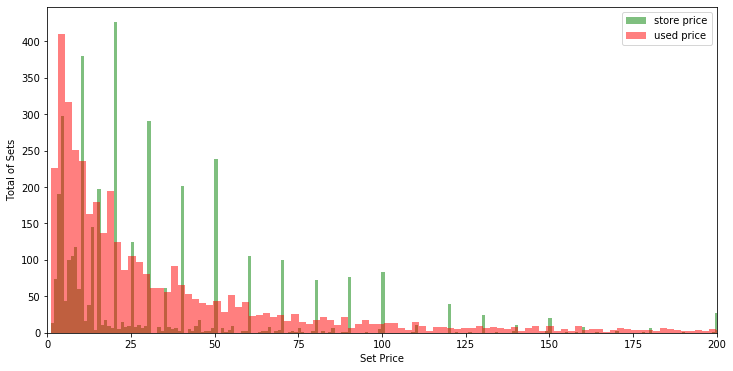

In [19]:
# store price and used price comparison

price_df = set_df.loc[(set_df['price_store']>=1) & (set_df['price_used']>=1)]

fig, axs = plt.subplots(1, 1, figsize=(12, 6), facecolor='white')
axs.set(xlabel='Set Price', ylabel='Total of Sets', xlim=(0, 200))

axs.hist(price_df['price_store'].values, bins=500, color='green', label='store price', alpha=.5)
axs.hist(price_df['price_used'].values, bins=500, color='red', label='used price', alpha=.5)

plt.legend()
plt.show()

In [20]:
# create aftermarket column 

set_df['aftermarket'] = set_df.apply(lh.get_aftermarket, axis=1)
set_df[['set_no', 'name', 'price_used', 'price_store', 'aftermarket']][100:110]

,set_no,name,price_used,price_store,aftermarket
100,4005-1,Tug Boat,22.0,10.0,12.0
101,4015-1,Freighter,65.0,NaN,NaN
102,4025-1,Fire Boat,33.0,NaN,NaN
103,6302-1,Mini-Figure Set,30.0,NaN,NaN
104,6308-1,Policemen,6.0,NaN,NaN
105,6362-1,Post Office,40.0,NaN,NaN
106,6372-1,Town House,47.0,NaN,NaN
107,6607-1,Service Truck,4.0,NaN,NaN
108,6608-1,Tractor,3.0,NaN,NaN
109,6651-1,Mail Truck,11.0,NaN,NaN


(array([  2.,   0.,   0.,   0.,   1.,   0.,   2.,   1.,   1.,   1.,   5.,
          0.,   0.,   3.,   0.,   2.,   0.,   6.,   7.,   5.,  13.,  12.,
         22.,  31.,  25.,  60.,  72., 134., 154., 325., 694., 908., 480.,
        248., 174., 105.,  62.,  69.,  60.,  41.,  22.,  33.,  24.,  14.,
         29.,  13.,  10.,   9.,   9.,   6.,  10.,   9.,   9.,   5.,   9.,
          6.,   5.,   5.,   2.,   7.,   1.,   7.,   4.,   2.,   3.,   1.,
          5.,   2.,   3.,   2.,   1.,   1.,   2.,   1.,   4.,   0.,   0.,
          1.,   1.,   2.,   1.,   0.,   3.,   0.,   0.,   2.,   1.,   1.,
          1.,   0.,   1.,   1.,   0.,   0.,   1.,   0.,   0.,   1.,   0.,
          3.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0., 

[Text(0, 0.5, 'Total of Sets'),
 (-200, 200),
 Text(0.5, 0, 'After-Market Value $')]

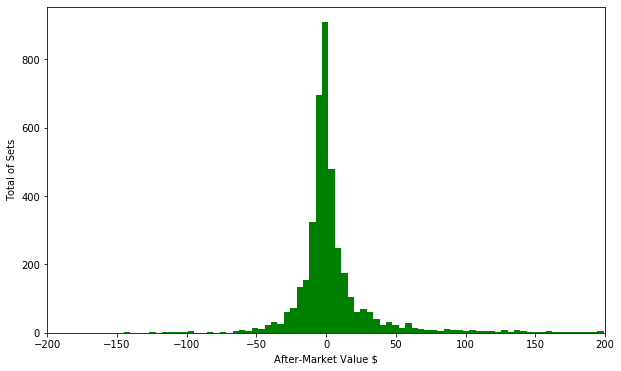

In [21]:
fig, axs = plt.subplots(1, 1, figsize=(10, 6), facecolor='white')

axs.hist(set_df.loc[set_df['aftermarket'].isna()==False]['aftermarket'].values, bins=200, color='green')
axs.set(xlabel='After-Market Value $', ylabel='Total of Sets', xlim=(-200, 200))  

plt.show()

##  3.1 Investigate Colinearity

File: ```colinearity.ipynb```

Goal: Investigate colinearity of the model's features.

In [22]:
FEATURE_FILE = 'data/merge_feature.csv'
full_df = pd.read_csv(FEATURE_FILE)
full_df.head()
full_df.info()

,set_no,name,price_store,price_used,year,volume,weight,number_parts,total_parts,number_spare_parts,...,windscreens_and_fuselage_tot_prts,znap_tot_prts,category,scolor_1st,scolor_2nd,popularity,aftermarket,adj_store_price,adj_aftermarket,profitable
0,15-1,Castle Minifigures,NaN,63.0,1984,NaN,NaN,16,38,0,...,0,0,Historical,Gray,Black,NaN,NaN,NaN,NaN,NaN
1,105-1,Mail Van,NaN,102.0,1984,NaN,NaN,34,65,0,...,1,0,Modern-Town,Red,White,4.0,NaN,NaN,NaN,NaN
2,3639-1,Paddy Wagon,NaN,14.0,1984,NaN,NaN,11,12,0,...,0,0,Bigfig-Junior,Blue,Black,NaN,NaN,NaN,NaN,NaN
3,3664-1,Bertie Bulldog (Police Chief) and Constable Bu...,NaN,31.0,1984,NaN,NaN,24,63,0,...,0,0,Bigfig-Junior,Blue,Red,5.0,NaN,NaN,NaN,NaN
4,3670-1,Service Station,20.0,54.0,1984,NaN,NaN,30,54,0,...,0,0,Bigfig-Junior,Yellow,Red,NaN,34.0,49.62,4.38,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4922 entries, 0 to 4921
Columns: 134 entries, set_no to profitable
dtypes: float64(9), int64(120), object(5)
memory usage: 5.0+ MB


In [23]:
# pull out numeric features 

feature_ls = ['year', 'volume', 'weight', 'total_parts', 'number_parts', 'number_colors', ]
feature_df = full_df[feature_ls]

In [24]:
# remove nan's, just for investigation 

feature_df = feature_df.dropna()
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 242 to 4920
Data columns (total 6 columns):
year             1938 non-null int64
volume           1938 non-null float64
weight           1938 non-null float64
total_parts      1938 non-null int64
number_parts     1938 non-null int64
number_colors    1938 non-null int64
dtypes: float64(2), int64(4)
memory usage: 106.0 KB


In [25]:
# variance inflation factor

vif = [VIF(feature_df.values, i) for i in range(feature_df.shape[1])]
list(zip(feature_df.columns, vif))

[('year', 6.800330031359406),
 ('volume', 29.54127621038952),
 ('weight', 46.165330132252286),
 ('total_parts', 19.462995882739012),
 ('number_parts', 20.32183516886591),
 ('number_colors', 16.267171157112692)]

## 3.2 Logistic Regression

File: ```logistic_regression.ipynb```

Goal: Use logistic regression to create a model for the profitability feature.

In [26]:
FEATURE_FILE = 'data/merge_feature.csv'
full_df = pd.read_csv(FEATURE_FILE)
full_df.head()
full_df.info()

,set_no,name,price_store,price_used,year,volume,weight,number_parts,total_parts,number_spare_parts,...,windscreens_and_fuselage_tot_prts,znap_tot_prts,category,scolor_1st,scolor_2nd,popularity,aftermarket,adj_store_price,adj_aftermarket,profitable
0,15-1,Castle Minifigures,NaN,63.0,1984,NaN,NaN,16,38,0,...,0,0,Historical,Gray,Black,NaN,NaN,NaN,NaN,NaN
1,105-1,Mail Van,NaN,102.0,1984,NaN,NaN,34,65,0,...,1,0,Modern-Town,Red,White,4.0,NaN,NaN,NaN,NaN
2,3639-1,Paddy Wagon,NaN,14.0,1984,NaN,NaN,11,12,0,...,0,0,Bigfig-Junior,Blue,Black,NaN,NaN,NaN,NaN,NaN
3,3664-1,Bertie Bulldog (Police Chief) and Constable Bu...,NaN,31.0,1984,NaN,NaN,24,63,0,...,0,0,Bigfig-Junior,Blue,Red,5.0,NaN,NaN,NaN,NaN
4,3670-1,Service Station,20.0,54.0,1984,NaN,NaN,30,54,0,...,0,0,Bigfig-Junior,Yellow,Red,NaN,34.0,49.62,4.38,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4922 entries, 0 to 4921
Columns: 134 entries, set_no to profitable
dtypes: float64(9), int64(120), object(5)
memory usage: 5.0+ MB


In [27]:
# drop volume and weight since they are sparse and colinear

full_df = full_df.drop(columns=['volume', 'weight'])

In [28]:
# filter out rows without profitable feature

full_df = full_df.loc[full_df['profitable'].isna()==False]
full_df.shape

(3832, 132)

In [29]:
# target series

target_sr = full_df['profitable']
target_sr.shape

(3832,)

In [30]:
# feature dataframe with one-hot encoding

columns_st = set(full_df.columns)
drop_st = set(['set_no', 'name', 'price_store', 'price_used', 'aftermarket', 'popularity', 
               'adj_store_price', 'adj_aftermarket', 'profitable'])
feature_st = columns_st.difference(drop_st)

feature_cat_df = full_df[list(feature_st)]

feature_df = pd.get_dummies(feature_cat_df, drop_first= True, 
               columns=['category', 'scolor_1st', 'scolor_2nd'])
feature_df.shape
feature_df.columns

(3832, 151)

Index(['supports_girders_and_cranes_cnt_prts', 'plates_tot_prts',
       'bars_ladders_and_fences_cnt_prts', 'transportation_-_land_tot_prts',
       'technic_bushes_tot_prts', 'windows_and_doors_cnt_prts',
       'string_bands_and_reels_tot_prts', 'technic_beams_cnt_prts',
       'bionicle_hero_factory_and_constraction_tot_prts',
       'bricks_sloped_cnt_prts',
       ...
       'scolor_1st_Yellow', 'scolor_2nd_Blue', 'scolor_2nd_Brown',
       'scolor_2nd_Gray', 'scolor_2nd_Green', 'scolor_2nd_Red',
       'scolor_2nd_Tan', 'scolor_2nd_Transparent', 'scolor_2nd_White',
       'scolor_2nd_Yellow'],
      dtype='object', length=151)

In [31]:
# split train and test 

TEST_SPLIT = 0.2
SEED = 666
MAX_ITER = 900

y_train, y_test, X_train, X_test = MS.train_test_split(target_sr, feature_df, stratify=feature_df['year'], 
                                                       test_size=TEST_SPLIT, random_state=SEED)
y_train.shape
y_test.shape 
X_train.shape
X_test.shape

(3065,)

(767,)

(3065, 151)

(767, 151)

In [32]:
# optimize hyper-parameters with grid-search

sampler = OS.SMOTE(random_state=SEED)
scaler = PP.StandardScaler()
logreg_best = LM.LogisticRegression(penalty='l2', max_iter=MAX_ITER, random_state=SEED)
pipeline = PL.Pipeline([('sampler', sampler), ('transformer', scaler), ('estimator', logreg_best)])

param_dx = {
    'estimator__solver': ['saga', 'liblinear'],
    'estimator__C': [1e-1, 1e1, 1e3, 1e5],
    }

searcher = MS.GridSearchCV(pipeline, param_dx, scoring='accuracy', cv=5)

In [33]:
# run the grid search

searcher.fit(X_train, y_train);

/Users/philbert/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/philbert/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/philbert/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/philbert/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/philbert/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: T

In [34]:
# check the best parameters found by grid search

best_parameters = searcher.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

train_pred = searcher.predict(X_train)
train_accuracy = MT.accuracy_score(y_train, train_pred)
test_pred = searcher.predict(X_test)
test_accuracy = MT.accuracy_score(y_test, test_pred)

print("")
print("Training Accuracy: {:.4}%".format(train_accuracy * 100))
print("")
print("Validation Accuracy: {:.4}%".format(test_accuracy * 100))
print("")
print("Random Guess Accuracy: {:.4}%".format(len(y_test[y_test==0]) / len(y_test) * 100))

Grid Search found the following optimal parameters: 
estimator__C: 1000.0
estimator__solver: 'liblinear'

Training Accuracy: 80.72%

Validation Accuracy: 76.01%

Random Guess Accuracy: 73.01%


## 3.3 Random Forest

File: ```random_forest.ipynb```

Goal: Use random forest to create a model for the profitability binary-class feature.

In [35]:
# use the same data file, target, features, and train-test as for logistic regression

In [36]:
# setup the grid-search
# not sure for process on grid-search, the best parameters keep changing, as if the default are best

sampler = OS.SMOTE(random_state=SEED)
scaler = PP.StandardScaler()
randforest = ES.RandomForestClassifier(random_state=SEED)
pipeline = PL.Pipeline([('sampler', sampler), ('transformer', scaler), ('estimator', randforest)])

param_dx = {
    'estimator__n_estimators': [140, 160],
    'estimator__max_depth': [20, 30],
    'estimator__min_impurity_decrease': [0.00001, 0.0001],
    }

searcher = MS.GridSearchCV(pipeline, param_dx, scoring='accuracy', cv=5)

In [37]:
# run the grid search

%timeit
searcher.fit(X_train, y_train);

In [38]:
# check the best parameters fund by grid search

best_parameters = searcher.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

train_pred = searcher.predict(X_train)
train_accuracy = MT.accuracy_score(y_train, train_pred)
test_pred = searcher.predict(X_test)
test_accuracy = MT.accuracy_score(y_test, test_pred)

print("")
print("Training Accuracy: {:.4}%".format(train_accuracy * 100))
print("")
print("Validation Accuracy: {:.4}%".format(test_accuracy * 100))
print("")
print("Random Guess Accuracy: {:.4}%".format(len(y_test[y_test==0]) / len(y_test) * 100))

Grid Search found the following optimal parameters: 
estimator__max_depth: 20
estimator__min_impurity_decrease: 1e-05
estimator__n_estimators: 160

Training Accuracy: 99.28%

Validation Accuracy: 78.36%

Random Guess Accuracy: 73.01%


## 3.4 XGBoost

File: ```xgboost.ipynb```